In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats

could not convert string to float: 


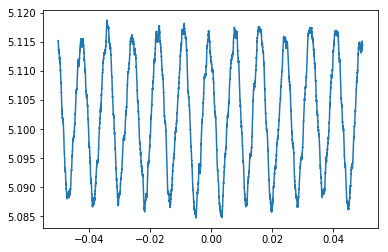

In [37]:
t = []
v = []
with open('da-light.csv', 'r') as f:
    f.readline()
    while True:
        try:
            a,b = map(float, f.readline().strip().split(','))
            t.append(a)
            v.append(b)
        except Exception as e:
            print(e)
            break

tt = []
vv = []
bucket = 500
temp = sum(v[:bucket])
for i in range(len(t) - bucket):
    tt.append(t[i])
    vv.append(temp / bucket)
    temp += (v[bucket + i] - v[i])

tt = tt[::10]
vv = vv[::10]
plt.plot(tt, vv)

In [38]:
samplerate = len(tt) / (tt[-1] - tt[0])
print(samplerate)

125010.04096714595


[]

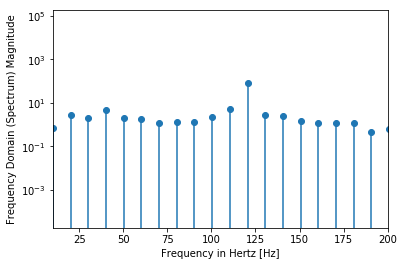

In [39]:
from scipy import fftpack

X = fftpack.fft(vv)
freqs = fftpack.fftfreq(len(vv)) * samplerate

fig, ax = plt.subplots()

ax.stem(freqs, np.abs(X))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(10, 200)
ax.set_yscale('log')
# ax.set_ylim(-5, 110)
plt.plot()

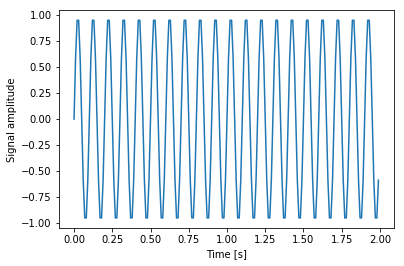

In [15]:
f = 10  # Frequency, in cycles per second, or Hertz
f_s = 100  # Sampling rate, or number of measurements per second

t = np.linspace(0, 2, 2 * f_s, endpoint=False)
x = np.sin(f * 2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, x)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal amplitude');

(-5, 110)

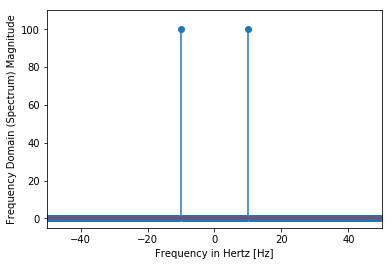

In [16]:
X = fftpack.fft(x)
freqs = fftpack.fftfreq(len(x)) * f_s

fig, ax = plt.subplots()

ax.stem(freqs, np.abs(X))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(-f_s / 2, f_s / 2)
ax.set_ylim(-5, 110)